In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.feature import canny
from skimage.morphology import reconstruction

In [66]:
coins = data.coins()
wing = cv2.imread('../testdata/set_1/043870_R_O.JPG')

In [67]:
wing.shape

(1756, 2641, 3)

In [68]:
gray = cv2.cvtColor(wing, cv2.COLOR_BGR2GRAY)

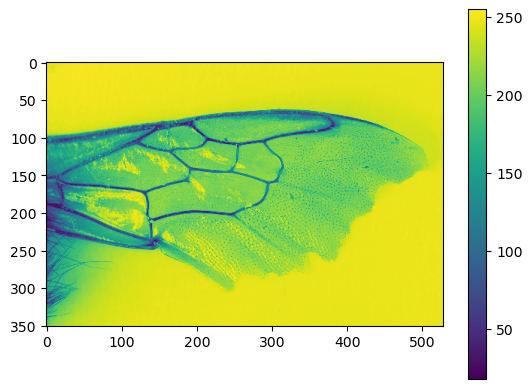

In [69]:
scale_percent = 0.20 
new_width = int(image.shape[1] * scale_percent)
new_height = int(image.shape[0] * scale_percent)
resized_wing = cv2.resize(gray, (new_width, new_height))
plt.imshow(resized_wing)
plt.colorbar()

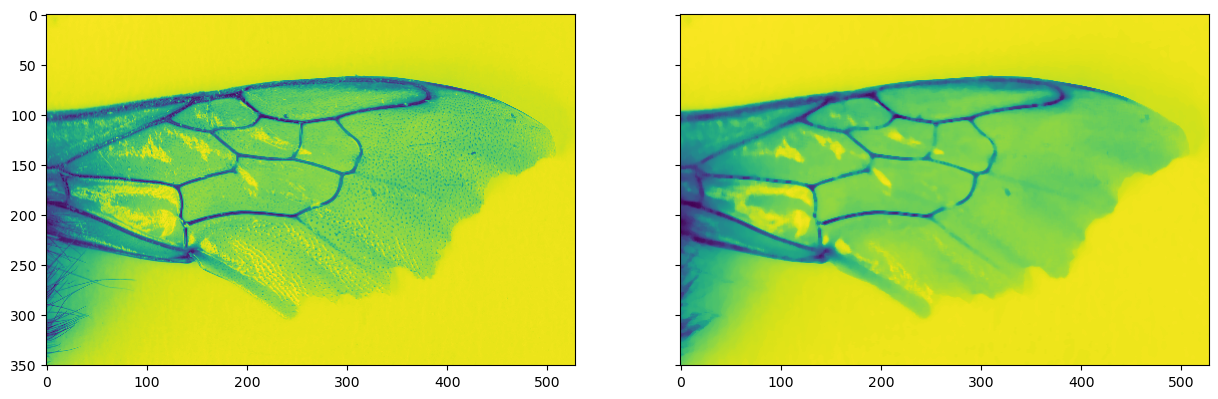

In [70]:
# wing_denoised = cv2.GaussianBlur(resized_wing, (5, 5), 0)
wing_denoised = cv2.medianBlur(resized_wing, 5)
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharex=True, sharey=True)
ax0.imshow(resized_wing)
ax1.imshow(wing_denoised)

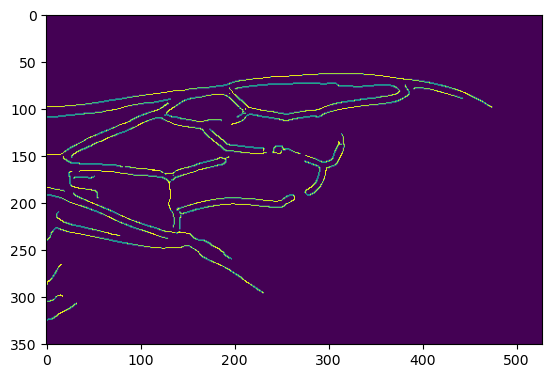

In [83]:
edges = canny(wing_denoised, sigma=3)

plt.imshow(edges)

In [20]:
image = wing
image = gaussian_filter(image, 1)

seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image

dilated = reconstruction(seed, mask, method='dilation')

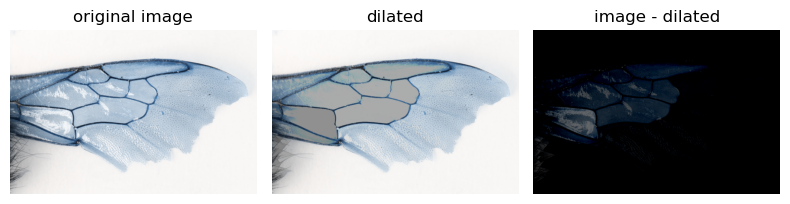

In [23]:
fig, (ax0, ax1, ax2) = plt.subplots(
    nrows=1, ncols=3, figsize=(8, 2.5), sharex=True, sharey=True
)

ax0.imshow(image.astype('uint8'), cmap='gray')
ax0.set_title('original image')
ax0.axis('off')

ax1.imshow(dilated.astype('uint8'), vmin=image.min(), vmax=image.max(), cmap='gray')
ax1.set_title('dilated')
ax1.axis('off')

ax2.imshow((image - dilated).astype('uint8'), cmap='gray')
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()